In [186]:
#import dataset preloaded with keras

from keras.datasets import mnist 

In [187]:
(train_images,train_lables) , (test_images,test_lables) = mnist.load_data()

In [188]:
train_images.shape

(60000, 28, 28)

In [189]:
train_lables

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [190]:
test_images.shape

(10000, 28, 28)

In [191]:
print(test_lables.shape)

test_lables

(10000,)


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [192]:
#The Network architecture 

from keras import models 
from keras import layers
from keras.layers import Dropout

In [193]:
network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(Dropout(0.3))

network.add(layers.Dense(10,activation='softmax'))

In [194]:
#compile

network.compile(optimizer='rmsprop', loss='categorical_crossentropy',
                metrics=['accuracy'])

In [195]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float') / 255 

In [196]:
train_images.shape

(60000, 784)

In [197]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [198]:
test_images.shape

(10000, 784)

In [199]:
train_lables

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [200]:
from keras.utils import to_categorical

train_lables = to_categorical(train_lables)
test_lables = to_categorical(test_lables)

In [201]:
history = network.fit(train_images,train_lables,epochs=5,batch_size=128
                     )

Epoch 1/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.2826 - accuracy: 0.9177
Epoch 2/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.1264 - accuracy: 0.9618
Epoch 3/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.0913 - accuracy: 0.9724
Epoch 4/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0735 - accuracy: 0.9776
Epoch 5/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0608 - accuracy: 0.9813


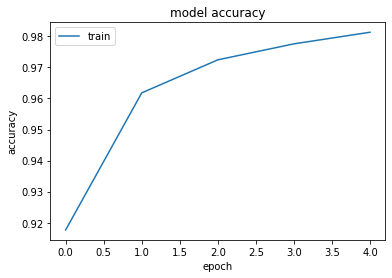

In [202]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

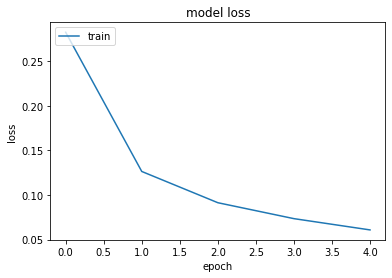

In [203]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [204]:
#test set accuracy
test_loss, test_acc = network.evaluate(test_images, test_lables)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 49us/step
test_acc: 0.9800000190734863


In [205]:
network.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


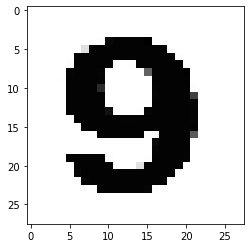

In [210]:
import cv2 as cv

file = '/Users/arunramji/Downloads/9.jpg'

image = cv.imread(file, cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28,28))
image = 255-image          #inverts image. Always gets read inverted.

plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()

In [211]:
pred = network.predict(image.reshape(1, 28*28), batch_size=1)

In [216]:
def number(x):
    for i in range(len(x[0])):
        #print(i)
        if x[0][i] == 1:
            return print('predicted Digit is: ' ,i)
        
        

In [217]:
number(pred)

predicted Digit is:  9
